In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir(r"C:\Users\prasath\Videos\NLP PROJECT\Review_data")
data=pd.read_csv(r"C:\Users\prasath\Videos\NLP PROJECT\Review_data\Review.csv")
data.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [3]:
data[data.sentiment==0][:5]

,sentiment,review
1,0,"Worst mobile i have bought ever, Battery is dr..."
4,0,The worst phone everThey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...
7,0,The battery level has worn down
8,0,It's over hitting problems...and phone hanging...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


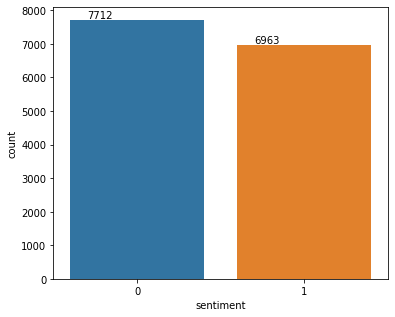

In [5]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='sentiment',data=data)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+50))

In [6]:
review_volume=data['sentiment'].value_counts()
review_volume

0    7712
1    6963
Name: sentiment, dtype: int64

In [7]:
(review_volume/data.shape[0])*100

0    52.551959
1    47.448041
Name: sentiment, dtype: float64

In [8]:
data.shape

(14675, 2)

In [9]:
data['length']=data.review.apply(len)
data.head()

,sentiment,review,length
0,1,Good but need updates and improvements,38
1,0,"Worst mobile i have bought ever, Battery is dr...",475
2,1,when I will get my 10% cash back.... its alrea...,61
3,1,Good,4
4,0,The worst phone everThey have changed the last...,156


In [10]:
data[data.length>100]

,sentiment,review,length
1,0,"Worst mobile i have bought ever, Battery is dr...",475
4,0,The worst phone everThey have changed the last...,156
6,1,"Phone is awesome. But while charging, it heats...",103
8,0,It's over hitting problems...and phone hanging...,177
13,0,I have faced the battery problem and motherboa...,111
...,...,...,...
14658,1,"My first expression was oh , it's killer note ...",233
14660,0,My new K8 note first impression is very bad.al...,156
14662,0,I am facing problem when incoming calls no num...,174
14666,0,I am facing problem with network connection.Wh...,278


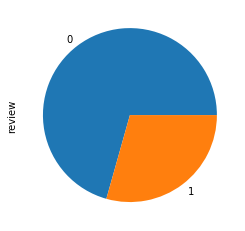

In [11]:
data[data.length>100].groupby('sentiment').review.count().plot(kind='pie')

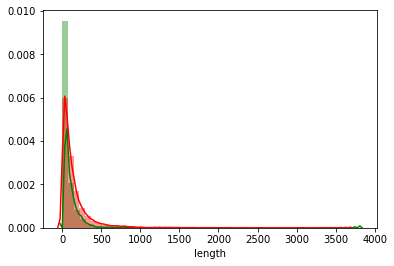

In [12]:
sns.distplot(data[data.sentiment==1].length,color='green',bins=50)
sns.distplot(data[data.sentiment==0].length,color='red',bins=50)
plt.show()

In [13]:
print("The mean remark of positive review is {}\nAnd negative review is {}".
      format(data[data.sentiment==1].length.mean(),
             data[data.sentiment==0].length.mean()))

The mean remark of positive review is 66.79118196179807
And negative review is 154.95733921161826


In [14]:
import nltk

In [15]:
data.review.values[0]

'Good but need updates and improvements'

In [16]:
tokenized_word=[]
for text in list(data.review.values):
    tokenized_word.append(nltk.word_tokenize(text))

In [17]:
tokenized_word[0]

['Good', 'but', 'need', 'updates', 'and', 'improvements']

### POS Tagging 

In [18]:
pos_tag=[]
for text in tokenized_word:
    pos_tag.append(nltk.pos_tag(text))

In [19]:
pos_tag[0]

[('Good', 'JJ'),
 ('but', 'CC'),
 ('need', 'VBP'),
 ('updates', 'NNS'),
 ('and', 'CC'),
 ('improvements', 'NNS')]

In [20]:
print(pos_tag[1])

[('Worst', 'NNP'), ('mobile', 'NN'), ('i', 'NN'), ('have', 'VBP'), ('bought', 'VBN'), ('ever', 'RB'), (',', ','), ('Battery', 'NNP'), ('is', 'VBZ'), ('draining', 'VBG'), ('like', 'IN'), ('hell', 'NN'), (',', ','), ('backup', 'NN'), ('is', 'VBZ'), ('only', 'RB'), ('6', 'CD'), ('to', 'TO'), ('7', 'CD'), ('hours', 'NNS'), ('with', 'IN'), ('internet', 'JJ'), ('uses', 'NNS'), (',', ','), ('even', 'RB'), ('if', 'IN'), ('I', 'PRP'), ('put', 'VBP'), ('mobile', 'JJ'), ('idle', 'NN'), ('its', 'PRP$'), ('getting', 'VBG'), ('discharged.This', 'NN'), ('is', 'VBZ'), ('biggest', 'JJS'), ('lie', 'NN'), ('from', 'IN'), ('Amazon', 'NNP'), ('&', 'CC'), ('Lenove', 'NNP'), ('which', 'WDT'), ('is', 'VBZ'), ('not', 'RB'), ('at', 'IN'), ('all', 'DT'), ('expected', 'VBN'), (',', ','), ('they', 'PRP'), ('are', 'VBP'), ('making', 'VBG'), ('full', 'JJ'), ('by', 'IN'), ('saying', 'VBG'), ('that', 'DT'), ('battery', 'NN'), ('is', 'VBZ'), ('4000MAH', 'CD'), ('&', 'CC'), ('booster', 'JJR'), ('charger', 'NN'), ('is', 

###  POS tags that correspond to nouns

In [21]:
only_Noun=[]
for pos_tagged_comment in pos_tag:
    only_Noun.append([word for (word,pos) in pos_tagged_comment if pos[0] =='N'])

In [22]:
print(only_Noun[1])

['Worst', 'mobile', 'i', 'Battery', 'hell', 'backup', 'hours', 'uses', 'idle', 'discharged.This', 'lie', 'Amazon', 'Lenove', 'battery', 'charger', 'hours', 'Lenovo', 'don']


In [23]:
!pip install TextBlob

### Using TextBlob

In [24]:
%%time
from textblob import TextBlob
posList=[]
for text in data.review:
    blob=TextBlob(text)
    posList.append(blob.pos_tags)

Wall time: 1min 25s


In [25]:
posList[0]

[('Good', 'JJ'),
 ('but', 'CC'),
 ('need', 'VBP'),
 ('updates', 'NNS'),
 ('and', 'CC'),
 ('improvements', 'NNS')]

In [26]:
%%time
from textblob import TextBlob
nounPhrasesList=[]
for text in data.review:
    blob=TextBlob(text)
    nounPhrasesList.append(blob.noun_phrases)

Wall time: 24.4 s


In [27]:
nounPhrasesList[1]

WordList(['worst', 'mobile i', 'battery', 'internet uses', 'amazon', 'lenove', 'booster charger', "charged.do n't", 'lenovo', 'us.please don'])

### Lematization

In [28]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [29]:
lemmaNet=[]
for terms in only_Noun:
    lemmaNet.append([lemmatizer.lemmatize(word) for word in terms])

In [30]:
print(lemmaNet[1])

['Worst', 'mobile', 'i', 'Battery', 'hell', 'backup', 'hour', 'us', 'idle', 'discharged.This', 'lie', 'Amazon', 'Lenove', 'battery', 'charger', 'hour', 'Lenovo', 'don']


### Remove stopwords and punctuation

In [31]:
import string
from nltk.corpus import stopwords

In [32]:
def cleanup_text(msg):
    processed_msg=[]
    for words in msg:
        no_punc=[char for char in words if char not in string.punctuation]
        no_punc="".join(no_punc)
        if len(no_punc)>0:
            processed_msg.append(no_punc)
    return [word for word in processed_msg if word.lower() not in stopwords.words("english")]

In [33]:
extracted_data=[]
for text in lemmaNet:
    extracted_data.append(cleanup_text(text))

In [34]:
print(extracted_data[1])

['Worst', 'mobile', 'Battery', 'hell', 'backup', 'hour', 'us', 'idle', 'dischargedThis', 'lie', 'Amazon', 'Lenove', 'battery', 'charger', 'hour', 'Lenovo']


### LDA Model

In [35]:
import gensim
dictionary=gensim.corpora.Dictionary(extracted_data)

In [36]:
count=0
for k,v in dictionary.iteritems():
    print(k,v)
    count+=1
    if count >10:
        break

0 improvement
1 update
2 Amazon
3 Battery
4 Lenove
5 Lenovo
6 Worst
7 backup
8 battery
9 charger
10 dischargedThis


In [37]:
bow_corpus=[dictionary.doc2bow(doc) for doc in extracted_data]
doc_num=100
bow_doc_x=bow_corpus[doc_num]
for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time in document#100.".format(bow_doc_x[i][0],
                                                     dictionary[bow_doc_x[i][0]],
                                                     bow_doc_x[i][1]))

Word 18 ("cash") appears 2 time in document#100.
Word 203 ("Product") appears 1 time in document#100.
Word 271 ("backlol") appears 1 time in document#100.
Word 272 ("fool") appears 1 time in document#100.
Word 273 ("way") appears 1 time in document#100.


In [38]:
len(bow_corpus)

14675

### Create LDA Topic Modelling  

In [39]:
import gensim 
lda_model=gensim.models.LdaMulticore(bow_corpus,
                                    num_topics=12,
                                    id2word=dictionary,
                                    passes=10,
                                    workers=2)

In [40]:
for idx,topic in lda_model.print_topics(-1):
    print("Topics : {} \n Words : {} ".format(idx,topic))
    print("\n")

Topics : 0 
 Words : 0.126*"money" + 0.099*"Nice" + 0.041*"waste" + 0.037*"speaker" + 0.028*"value" + 0.019*"Value" + 0.019*"Waste" + 0.013*"work" + 0.011*"plz" + 0.010*"sound" 


Topics : 1 
 Words : 0.169*"mobile" + 0.034*"screen" + 0.022*"glass" + 0.019*"Lenovo" + 0.018*"Bad" + 0.017*"phone" + 0.016*"note" + 0.015*"feature" + 0.009*"lenovo" + 0.009*"day" 


Topics : 2 
 Words : 0.083*"note" + 0.074*"Lenovo" + 0.051*"k8" + 0.029*"Phone" + 0.025*"h" + 0.018*"hai" + 0.012*"K8" + 0.010*"ho" + 0.010*"PHONE" + 0.008*"superb" 


Topics : 3 
 Words : 0.115*"camera" + 0.042*"phone" + 0.033*"quality" + 0.017*"feature" + 0.016*"device" + 0.016*"battery" + 0.012*"processor" + 0.012*"mode" + 0.011*"performance" + 0.011*"Camera" 


Topics : 4 
 Words : 0.115*"battery" + 0.077*"phone" + 0.041*"Battery" + 0.036*"day" + 0.033*"backup" + 0.031*"hour" + 0.025*"issue" + 0.021*"Awesome" + 0.018*"time" + 0.017*"life" 


Topics : 5 
 Words : 0.228*"problem" + 0.065*"Mobile" + 0.057*"heating" + 0.029*"hand

In [41]:
from gensim.models import CoherenceModel
coherence_model_lda=CoherenceModel(model=lda_model,texts=extracted_data,dictionary=dictionary)
coherence_lda=coherence_model_lda.get_coherence()
print("Coherence_Score : ",coherence_lda)

Coherence_Score :  0.49603971320699597


In [63]:
def compute_coherence_values(corpus,texts,dictionary,k,a,b):
    lda_model=gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=dictionary,
                                        num_topics=k,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        alpha=a,
                                        eta=b,
                                        per_word_topics=True)
    coherence_model_lda=CoherenceModel(model=lda_model,texts=texts,dictionary=dictionary,coherence='c_v')
    return coherence_model_lda.get_coherence()

In [64]:
#from gensim.models import CoherenceModel
#coherence_model_lda=CoherenceModel(model=lda_model,texts=extracted_data,dictionary=dictionary)
#coherence_lda=coherence_model_lda.get_coherence()
#print("\n Coherence_Score : ",coherence_lda)

In [65]:
len(extracted_data),len(bow_corpus)

(14675, 14675)

In [66]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 3
max_topics = 19
step_size = 3
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
#alpha.append('symmetric')
#alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
#beta.append('symmetric')
# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [gensim.utils.ClippedCorpus(bow_corpus, num_of_docs*0.75).corpus,bow_corpus]

In [67]:
compute_coherence_values(bow_corpus,extracted_data,dictionary,5,0.1,3)

0.56504826332648

In [68]:
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=10)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv =0
                    #print( "i is {}, k is {}, a is {}, b is {}".format(i,k,a,b) )
                    cv = compute_coherence_values(corpus_sets[i],extracted_data,dictionary,k,a,b)
                    print( "i is {}, k is {}, a is {}, b is {} and final cv is {}".format(i,k,a,b,cv) )
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

 10%|████████▎                                                                          | 1/10 [01:23<12:31, 83.48s/it]

i is 0, k is 3, a is 0.01, b is 0.01 and final cv is 0.47294860852039317


 20%|████████████████▌                                                                  | 2/10 [02:32<10:33, 79.16s/it]

i is 0, k is 3, a is 0.01, b is 0.31 and final cv is 0.47021773965471353


 30%|████████████████████████▉                                                          | 3/10 [04:23<10:20, 88.68s/it]

i is 0, k is 3, a is 0.01, b is 0.61 and final cv is 0.4290895195066262


 40%|█████████████████████████████████▏                                                 | 4/10 [05:24<08:02, 80.37s/it]

i is 0, k is 3, a is 0.01, b is 0.9099999999999999 and final cv is 0.45568760821160853


 50%|█████████████████████████████████████████▌                                         | 5/10 [06:30<06:20, 76.18s/it]

i is 0, k is 3, a is 0.31, b is 0.01 and final cv is 0.5095209602863751


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [08:37<06:04, 91.25s/it]

i is 0, k is 3, a is 0.31, b is 0.31 and final cv is 0.48888098267484725


 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [10:52<05:13, 104.35s/it]

i is 0, k is 3, a is 0.31, b is 0.61 and final cv is 0.5231205144884373


 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [13:16<03:52, 116.47s/it]

i is 0, k is 3, a is 0.31, b is 0.9099999999999999 and final cv is 0.49591960989548484


 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [15:06<01:54, 114.54s/it]

i is 0, k is 3, a is 0.61, b is 0.01 and final cv is 0.5047025059940521


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [17:08<00:00, 116.56s/it]

i is 0, k is 3, a is 0.61, b is 0.31 and final cv is 0.5387624853524822


11it [19:16, 120.16s/it]                                                                                               

i is 0, k is 3, a is 0.61, b is 0.61 and final cv is 0.5063098570371537


12it [20:36, 108.06s/it]

i is 0, k is 3, a is 0.61, b is 0.9099999999999999 and final cv is 0.52226205678635


13it [21:26, 90.59s/it] 

i is 0, k is 3, a is 0.9099999999999999, b is 0.01 and final cv is 0.5088408966642918


14it [22:20, 79.49s/it]

i is 0, k is 3, a is 0.9099999999999999, b is 0.31 and final cv is 0.5459841128910012


15it [23:14, 72.00s/it]

i is 0, k is 3, a is 0.9099999999999999, b is 0.61 and final cv is 0.5628941254830812


16it [24:11, 67.43s/it]

i is 0, k is 3, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.5309068589251488


17it [25:13, 65.80s/it]

i is 0, k is 6, a is 0.01, b is 0.01 and final cv is 0.472668522843633


18it [26:13, 64.25s/it]

i is 0, k is 6, a is 0.01, b is 0.31 and final cv is 0.5482641344763777


19it [27:19, 64.68s/it]

i is 0, k is 6, a is 0.01, b is 0.61 and final cv is 0.5358478125591395


20it [28:19, 63.15s/it]

i is 0, k is 6, a is 0.01, b is 0.9099999999999999 and final cv is 0.5533565205076594


21it [29:19, 62.32s/it]

i is 0, k is 6, a is 0.31, b is 0.01 and final cv is 0.5171333926881417


22it [30:20, 61.87s/it]

i is 0, k is 6, a is 0.31, b is 0.31 and final cv is 0.5261997564214169


23it [31:23, 62.17s/it]

i is 0, k is 6, a is 0.31, b is 0.61 and final cv is 0.5087985955666509


24it [32:26, 62.43s/it]

i is 0, k is 6, a is 0.31, b is 0.9099999999999999 and final cv is 0.5323152708622594


25it [33:20, 60.02s/it]

i is 0, k is 6, a is 0.61, b is 0.01 and final cv is 0.5309478622432094


26it [34:16, 58.81s/it]

i is 0, k is 6, a is 0.61, b is 0.31 and final cv is 0.5216265969482466


27it [35:13, 58.11s/it]

i is 0, k is 6, a is 0.61, b is 0.61 and final cv is 0.5407159047402751


28it [36:11, 58.03s/it]

i is 0, k is 6, a is 0.61, b is 0.9099999999999999 and final cv is 0.5073835110223944


29it [37:05, 56.93s/it]

i is 0, k is 6, a is 0.9099999999999999, b is 0.01 and final cv is 0.5242608409131955


30it [38:00, 56.45s/it]

i is 0, k is 6, a is 0.9099999999999999, b is 0.31 and final cv is 0.5035645490332675


31it [38:55, 55.82s/it]

i is 0, k is 6, a is 0.9099999999999999, b is 0.61 and final cv is 0.516897543890959


32it [39:50, 55.82s/it]

i is 0, k is 6, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.5020316086913178


33it [40:53, 57.83s/it]

i is 0, k is 9, a is 0.01, b is 0.01 and final cv is 0.5019395613041389


34it [41:58, 60.03s/it]

i is 0, k is 9, a is 0.01, b is 0.31 and final cv is 0.5050261785374068


35it [43:02, 61.28s/it]

i is 0, k is 9, a is 0.01, b is 0.61 and final cv is 0.593485746941517


36it [44:05, 61.76s/it]

i is 0, k is 9, a is 0.01, b is 0.9099999999999999 and final cv is 0.5932041173174065


37it [45:08, 62.13s/it]

i is 0, k is 9, a is 0.31, b is 0.01 and final cv is 0.42936250236166296


38it [46:11, 62.23s/it]

i is 0, k is 9, a is 0.31, b is 0.31 and final cv is 0.49607173027629287


39it [47:15, 62.90s/it]

i is 0, k is 9, a is 0.31, b is 0.61 and final cv is 0.5742970399713255


40it [48:20, 63.48s/it]

i is 0, k is 9, a is 0.31, b is 0.9099999999999999 and final cv is 0.5797132041371182


41it [49:20, 62.58s/it]

i is 0, k is 9, a is 0.61, b is 0.01 and final cv is 0.47401032635534396


42it [3:16:05, 2685.27s/it]

i is 0, k is 9, a is 0.61, b is 0.31 and final cv is 0.504221941224489


43it [3:17:49, 1910.94s/it]

i is 0, k is 9, a is 0.61, b is 0.61 and final cv is 0.5768576703886327


44it [3:19:14, 1362.93s/it]

i is 0, k is 9, a is 0.61, b is 0.9099999999999999 and final cv is 0.5661072249890683


45it [3:20:42, 980.50s/it] 

i is 0, k is 9, a is 0.9099999999999999, b is 0.01 and final cv is 0.4874785421232427


46it [3:22:12, 713.44s/it]

i is 0, k is 9, a is 0.9099999999999999, b is 0.31 and final cv is 0.48735132325797675


47it [3:23:34, 523.98s/it]

i is 0, k is 9, a is 0.9099999999999999, b is 0.61 and final cv is 0.5613959034763076


48it [3:24:54, 390.85s/it]

i is 0, k is 9, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.5382766609144713


49it [3:26:35, 303.84s/it]

i is 0, k is 12, a is 0.01, b is 0.01 and final cv is 0.4514610842311573


50it [3:28:07, 240.14s/it]

i is 0, k is 12, a is 0.01, b is 0.31 and final cv is 0.5158853602758429


51it [3:29:36, 194.86s/it]

i is 0, k is 12, a is 0.01, b is 0.61 and final cv is 0.5527252365167824


52it [3:31:02, 162.30s/it]

i is 0, k is 12, a is 0.01, b is 0.9099999999999999 and final cv is 0.5290426763018111


53it [3:32:32, 140.70s/it]

i is 0, k is 12, a is 0.31, b is 0.01 and final cv is 0.4312760068717039


54it [3:34:03, 125.53s/it]

i is 0, k is 12, a is 0.31, b is 0.31 and final cv is 0.47833919959992116


55it [3:35:31, 114.36s/it]

i is 0, k is 12, a is 0.31, b is 0.61 and final cv is 0.5820943011182979


56it [3:37:01, 107.10s/it]

i is 0, k is 12, a is 0.31, b is 0.9099999999999999 and final cv is 0.5784561472762779


57it [3:39:35, 121.03s/it]

i is 0, k is 12, a is 0.61, b is 0.01 and final cv is 0.49326211614907844


58it [3:41:01, 110.79s/it]

i is 0, k is 12, a is 0.61, b is 0.31 and final cv is 0.49647378380620893


59it [3:42:56, 112.06s/it]

i is 0, k is 12, a is 0.61, b is 0.61 and final cv is 0.5457721770324276


60it [3:44:34, 107.82s/it]

i is 0, k is 12, a is 0.61, b is 0.9099999999999999 and final cv is 0.5832998665043431


61it [3:46:10, 104.24s/it]

i is 0, k is 12, a is 0.9099999999999999, b is 0.01 and final cv is 0.45722952731594985


62it [3:48:10, 108.88s/it]

i is 0, k is 12, a is 0.9099999999999999, b is 0.31 and final cv is 0.543211674369031


63it [3:49:44, 104.54s/it]

i is 0, k is 12, a is 0.9099999999999999, b is 0.61 and final cv is 0.5433932385294739


64it [3:51:22, 102.56s/it]

i is 0, k is 12, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.5718603146643632


65it [3:53:39, 112.71s/it]

i is 0, k is 15, a is 0.01, b is 0.01 and final cv is 0.4564982704627058


66it [3:56:01, 121.59s/it]

i is 0, k is 15, a is 0.01, b is 0.31 and final cv is 0.5221277244016674


67it [3:58:32, 130.30s/it]

i is 0, k is 15, a is 0.01, b is 0.61 and final cv is 0.5594184133181367


68it [4:00:17, 122.71s/it]

i is 0, k is 15, a is 0.01, b is 0.9099999999999999 and final cv is 0.43820654540603576


69it [4:03:05, 136.38s/it]

i is 0, k is 15, a is 0.31, b is 0.01 and final cv is 0.40796531662046065


70it [4:04:50, 127.11s/it]

i is 0, k is 15, a is 0.31, b is 0.31 and final cv is 0.503492675339105


71it [4:06:54, 126.19s/it]

i is 0, k is 15, a is 0.31, b is 0.61 and final cv is 0.6013466319537281


72it [4:08:38, 119.27s/it]

i is 0, k is 15, a is 0.31, b is 0.9099999999999999 and final cv is 0.536901881861246


73it [4:10:23, 115.04s/it]

i is 0, k is 15, a is 0.61, b is 0.01 and final cv is 0.4388073598915472


74it [4:12:59, 127.39s/it]

i is 0, k is 15, a is 0.61, b is 0.31 and final cv is 0.5068578505479168


75it [4:15:42, 138.05s/it]

i is 0, k is 15, a is 0.61, b is 0.61 and final cv is 0.532940599984701


76it [4:18:06, 139.97s/it]

i is 0, k is 15, a is 0.61, b is 0.9099999999999999 and final cv is 0.5876881924438317


77it [4:20:34, 142.38s/it]

i is 0, k is 15, a is 0.9099999999999999, b is 0.01 and final cv is 0.44764350540891906


78it [4:23:10, 146.38s/it]

i is 0, k is 15, a is 0.9099999999999999, b is 0.31 and final cv is 0.5078737483994464


79it [4:25:17, 140.62s/it]

i is 0, k is 15, a is 0.9099999999999999, b is 0.61 and final cv is 0.5473250218259377


80it [4:26:56, 127.93s/it]

i is 0, k is 15, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.5338640111428768


81it [4:29:27, 135.08s/it]

i is 0, k is 18, a is 0.01, b is 0.01 and final cv is 0.4421674406413147


82it [4:31:45, 136.00s/it]

i is 0, k is 18, a is 0.01, b is 0.31 and final cv is 0.5076290199303218


83it [4:33:49, 132.42s/it]

i is 0, k is 18, a is 0.01, b is 0.61 and final cv is 0.535507272922033


84it [4:36:20, 137.96s/it]

i is 0, k is 18, a is 0.01, b is 0.9099999999999999 and final cv is 0.4345030612684282


85it [4:39:02, 145.08s/it]

i is 0, k is 18, a is 0.31, b is 0.01 and final cv is 0.3887219834776387


86it [4:40:55, 135.46s/it]

i is 0, k is 18, a is 0.31, b is 0.31 and final cv is 0.4861245020757365


87it [4:43:25, 139.93s/it]

i is 0, k is 18, a is 0.31, b is 0.61 and final cv is 0.5603061404343573


88it [4:46:27, 152.35s/it]

i is 0, k is 18, a is 0.31, b is 0.9099999999999999 and final cv is 0.514157064061239


89it [4:49:06, 154.54s/it]

i is 0, k is 18, a is 0.61, b is 0.01 and final cv is 0.4313811461434593


90it [4:51:30, 151.13s/it]

i is 0, k is 18, a is 0.61, b is 0.31 and final cv is 0.5419240909494105


91it [4:53:16, 137.83s/it]

i is 0, k is 18, a is 0.61, b is 0.61 and final cv is 0.542622181966438


92it [4:55:02, 128.14s/it]

i is 0, k is 18, a is 0.61, b is 0.9099999999999999 and final cv is 0.6579312852860091


93it [4:57:01, 125.40s/it]

i is 0, k is 18, a is 0.9099999999999999, b is 0.01 and final cv is 0.44234964485256795


94it [4:59:18, 128.77s/it]

i is 0, k is 18, a is 0.9099999999999999, b is 0.31 and final cv is 0.49083482909728765


95it [5:02:17, 144.05s/it]

i is 0, k is 18, a is 0.9099999999999999, b is 0.61 and final cv is 0.5870742711679857


96it [5:04:35, 142.27s/it]

i is 0, k is 18, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.5457160238656322


97it [5:05:44, 120.32s/it]

i is 1, k is 3, a is 0.01, b is 0.01 and final cv is 0.4726363394976629


98it [5:06:57, 105.83s/it]

i is 1, k is 3, a is 0.01, b is 0.31 and final cv is 0.4789404770955363


99it [5:08:05, 94.76s/it] 

i is 1, k is 3, a is 0.01, b is 0.61 and final cv is 0.4313959587196639


100it [5:09:12, 86.36s/it]

i is 1, k is 3, a is 0.01, b is 0.9099999999999999 and final cv is 0.4465629593734454


101it [5:10:17, 79.86s/it]

i is 1, k is 3, a is 0.31, b is 0.01 and final cv is 0.4964579706075043


102it [5:11:32, 78.38s/it]

i is 1, k is 3, a is 0.31, b is 0.31 and final cv is 0.5160558014682887


103it [5:12:49, 77.96s/it]

i is 1, k is 3, a is 0.31, b is 0.61 and final cv is 0.5204426886433665


104it [5:14:05, 77.43s/it]

i is 1, k is 3, a is 0.31, b is 0.9099999999999999 and final cv is 0.47018828656114015


105it [5:15:07, 72.87s/it]

i is 1, k is 3, a is 0.61, b is 0.01 and final cv is 0.49849051883335255


106it [5:16:17, 71.79s/it]

i is 1, k is 3, a is 0.61, b is 0.31 and final cv is 0.534248285323018


107it [5:17:29, 71.95s/it]

i is 1, k is 3, a is 0.61, b is 0.61 and final cv is 0.5298980378073593


108it [5:18:42, 72.37s/it]

i is 1, k is 3, a is 0.61, b is 0.9099999999999999 and final cv is 0.511250883411309


109it [6:13:26, 1035.72s/it]

i is 1, k is 3, a is 0.9099999999999999, b is 0.01 and final cv is 0.501012101950974


110it [6:14:28, 743.74s/it] 

i is 1, k is 3, a is 0.9099999999999999, b is 0.31 and final cv is 0.5346297897960105


111it [6:15:30, 539.08s/it]

i is 1, k is 3, a is 0.9099999999999999, b is 0.61 and final cv is 0.5514377952032484


112it [6:16:27, 394.64s/it]

i is 1, k is 3, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.5212496072874524


113it [6:17:30, 295.17s/it]

i is 1, k is 6, a is 0.01, b is 0.01 and final cv is 0.45724687341282877


114it [6:18:42, 228.11s/it]

i is 1, k is 6, a is 0.01, b is 0.31 and final cv is 0.5116269138243633


115it [6:19:44, 178.36s/it]

i is 1, k is 6, a is 0.01, b is 0.61 and final cv is 0.5409342196588675


116it [6:20:43, 142.60s/it]

i is 1, k is 6, a is 0.01, b is 0.9099999999999999 and final cv is 0.5607684512524452


117it [6:21:48, 119.24s/it]

i is 1, k is 6, a is 0.31, b is 0.01 and final cv is 0.5256380347248913


118it [6:22:54, 103.13s/it]

i is 1, k is 6, a is 0.31, b is 0.31 and final cv is 0.50338563976003


119it [6:24:06, 93.98s/it] 

i is 1, k is 6, a is 0.31, b is 0.61 and final cv is 0.5497385964867264


120it [6:25:12, 85.58s/it]

i is 1, k is 6, a is 0.31, b is 0.9099999999999999 and final cv is 0.5409477342741813


121it [6:26:13, 78.01s/it]

i is 1, k is 6, a is 0.61, b is 0.01 and final cv is 0.5138638919124652


122it [6:27:15, 73.30s/it]

i is 1, k is 6, a is 0.61, b is 0.31 and final cv is 0.52668186616114


123it [6:28:16, 69.63s/it]

i is 1, k is 6, a is 0.61, b is 0.61 and final cv is 0.5168645097754152


124it [6:29:18, 67.20s/it]

i is 1, k is 6, a is 0.61, b is 0.9099999999999999 and final cv is 0.49017653638032926


125it [6:30:20, 65.62s/it]

i is 1, k is 6, a is 0.9099999999999999, b is 0.01 and final cv is 0.5255766799432695


126it [6:31:19, 63.83s/it]

i is 1, k is 6, a is 0.9099999999999999, b is 0.31 and final cv is 0.5039359573124336


127it [6:32:23, 63.72s/it]

i is 1, k is 6, a is 0.9099999999999999, b is 0.61 and final cv is 0.5255109323479966


128it [6:33:27, 63.94s/it]

i is 1, k is 6, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.4857395013637884


129it [6:34:36, 65.41s/it]

i is 1, k is 9, a is 0.01, b is 0.01 and final cv is 0.5079936467491536


130it [6:35:43, 65.86s/it]

i is 1, k is 9, a is 0.01, b is 0.31 and final cv is 0.5045017099448368


131it [6:36:50, 66.33s/it]

i is 1, k is 9, a is 0.01, b is 0.61 and final cv is 0.5670210382565616


132it [6:37:57, 66.47s/it]

i is 1, k is 9, a is 0.01, b is 0.9099999999999999 and final cv is 0.6096426778308394


133it [6:39:05, 66.98s/it]

i is 1, k is 9, a is 0.31, b is 0.01 and final cv is 0.4524832287461936


134it [6:40:25, 70.72s/it]

i is 1, k is 9, a is 0.31, b is 0.31 and final cv is 0.46468139635620775


135it [6:41:36, 70.80s/it]

i is 1, k is 9, a is 0.31, b is 0.61 and final cv is 0.5535803644861791


136it [6:42:44, 70.11s/it]

i is 1, k is 9, a is 0.31, b is 0.9099999999999999 and final cv is 0.5861548318910468


137it [6:43:52, 69.32s/it]

i is 1, k is 9, a is 0.61, b is 0.01 and final cv is 0.4602224934936667


138it [6:44:59, 68.85s/it]

i is 1, k is 9, a is 0.61, b is 0.31 and final cv is 0.5043661396908498


139it [6:46:05, 67.76s/it]

i is 1, k is 9, a is 0.61, b is 0.61 and final cv is 0.5826403228626114


140it [6:47:10, 66.99s/it]

i is 1, k is 9, a is 0.61, b is 0.9099999999999999 and final cv is 0.5498373883219569


141it [6:48:17, 66.99s/it]

i is 1, k is 9, a is 0.9099999999999999, b is 0.01 and final cv is 0.4681698609929275


142it [6:49:23, 66.80s/it]

i is 1, k is 9, a is 0.9099999999999999, b is 0.31 and final cv is 0.5162542761197554


143it [6:50:29, 66.40s/it]

i is 1, k is 9, a is 0.9099999999999999, b is 0.61 and final cv is 0.5536720706630632


144it [6:59:54, 215.96s/it]

i is 1, k is 9, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.547614318600867


145it [7:01:57, 188.15s/it]

i is 1, k is 12, a is 0.01, b is 0.01 and final cv is 0.4726565776825009


146it [7:03:35, 161.09s/it]

i is 1, k is 12, a is 0.01, b is 0.31 and final cv is 0.5179710564984369


147it [7:05:15, 142.76s/it]

i is 1, k is 12, a is 0.01, b is 0.61 and final cv is 0.5700313866631255


148it [7:07:27, 139.47s/it]

i is 1, k is 12, a is 0.01, b is 0.9099999999999999 and final cv is 0.48765184594707317


149it [7:09:46, 139.37s/it]

i is 1, k is 12, a is 0.31, b is 0.01 and final cv is 0.45669803648683605


150it [7:11:41, 132.05s/it]

i is 1, k is 12, a is 0.31, b is 0.31 and final cv is 0.4767268806129423


151it [7:13:19, 121.95s/it]

i is 1, k is 12, a is 0.31, b is 0.61 and final cv is 0.532530449445047


152it [7:15:06, 117.33s/it]

i is 1, k is 12, a is 0.31, b is 0.9099999999999999 and final cv is 0.5634462109981105


153it [7:16:49, 113.26s/it]

i is 1, k is 12, a is 0.61, b is 0.01 and final cv is 0.4755100123314658


154it [7:19:03, 119.45s/it]

i is 1, k is 12, a is 0.61, b is 0.31 and final cv is 0.5209560239495358


155it [7:21:34, 128.70s/it]

i is 1, k is 12, a is 0.61, b is 0.61 and final cv is 0.5720722316231767


156it [7:24:36, 144.94s/it]

i is 1, k is 12, a is 0.61, b is 0.9099999999999999 and final cv is 0.5748337600154448


157it [7:27:38, 155.99s/it]

i is 1, k is 12, a is 0.9099999999999999, b is 0.01 and final cv is 0.46726940652911075


158it [7:30:37, 162.76s/it]

i is 1, k is 12, a is 0.9099999999999999, b is 0.31 and final cv is 0.4987814769039686


159it [7:33:39, 168.57s/it]

i is 1, k is 12, a is 0.9099999999999999, b is 0.61 and final cv is 0.5297212195379079


160it [7:36:08, 162.79s/it]

i is 1, k is 12, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.5592916955417152


161it [7:37:37, 140.53s/it]

i is 1, k is 15, a is 0.01, b is 0.01 and final cv is 0.45864513802968726


162it [7:39:03, 124.34s/it]

i is 1, k is 15, a is 0.01, b is 0.31 and final cv is 0.5643437732299177


163it [7:40:28, 112.55s/it]

i is 1, k is 15, a is 0.01, b is 0.61 and final cv is 0.5377960498578409


164it [7:41:50, 103.26s/it]

i is 1, k is 15, a is 0.01, b is 0.9099999999999999 and final cv is 0.4190944194959208


165it [7:43:15, 97.79s/it] 

i is 1, k is 15, a is 0.31, b is 0.01 and final cv is 0.4104177865887712


166it [7:44:40, 93.99s/it]

i is 1, k is 15, a is 0.31, b is 0.31 and final cv is 0.5041920955186985


167it [7:46:49, 104.36s/it]

i is 1, k is 15, a is 0.31, b is 0.61 and final cv is 0.5965428229835213


168it [7:49:46, 126.13s/it]

i is 1, k is 15, a is 0.31, b is 0.9099999999999999 and final cv is 0.5636681395449997


169it [7:52:15, 133.24s/it]

i is 1, k is 15, a is 0.61, b is 0.01 and final cv is 0.44878465150964936


170it [7:54:59, 142.42s/it]

i is 1, k is 15, a is 0.61, b is 0.31 and final cv is 0.5128951122508485


171it [7:57:33, 145.87s/it]

i is 1, k is 15, a is 0.61, b is 0.61 and final cv is 0.5465968258769851


172it [7:59:22, 134.91s/it]

i is 1, k is 15, a is 0.61, b is 0.9099999999999999 and final cv is 0.6038416133668643


173it [8:01:09, 126.38s/it]

i is 1, k is 15, a is 0.9099999999999999, b is 0.01 and final cv is 0.4504871398895386


174it [8:03:12, 125.40s/it]

i is 1, k is 15, a is 0.9099999999999999, b is 0.31 and final cv is 0.47391959470969586


175it [8:05:32, 129.78s/it]

i is 1, k is 15, a is 0.9099999999999999, b is 0.61 and final cv is 0.5564986610731082


176it [8:08:03, 136.18s/it]

i is 1, k is 15, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.5284681608811658


177it [8:10:40, 142.45s/it]

i is 1, k is 18, a is 0.01, b is 0.01 and final cv is 0.44012575320576924


178it [8:13:30, 150.60s/it]

i is 1, k is 18, a is 0.01, b is 0.31 and final cv is 0.5187089955332609


179it [8:16:23, 157.29s/it]

i is 1, k is 18, a is 0.01, b is 0.61 and final cv is 0.5061224457514926


180it [8:19:29, 165.92s/it]

i is 1, k is 18, a is 0.01, b is 0.9099999999999999 and final cv is 0.4263228679873421


181it [8:21:35, 154.00s/it]

i is 1, k is 18, a is 0.31, b is 0.01 and final cv is 0.39453032836950414


182it [8:23:33, 143.24s/it]

i is 1, k is 18, a is 0.31, b is 0.31 and final cv is 0.48852804135403766


183it [8:25:15, 130.74s/it]

i is 1, k is 18, a is 0.31, b is 0.61 and final cv is 0.5572191172379543


184it [8:27:02, 123.85s/it]

i is 1, k is 18, a is 0.31, b is 0.9099999999999999 and final cv is 0.5206052397215961


185it [8:28:53, 119.85s/it]

i is 1, k is 18, a is 0.61, b is 0.01 and final cv is 0.4341872529569428


186it [8:30:34, 114.33s/it]

i is 1, k is 18, a is 0.61, b is 0.31 and final cv is 0.5497589830818439


187it [8:32:21, 111.93s/it]

i is 1, k is 18, a is 0.61, b is 0.61 and final cv is 0.5429129859782015


188it [8:34:01, 108.32s/it]

i is 1, k is 18, a is 0.61, b is 0.9099999999999999 and final cv is 0.5963154361548297


189it [8:35:43, 106.60s/it]

i is 1, k is 18, a is 0.9099999999999999, b is 0.01 and final cv is 0.44611457893945644


190it [8:37:29, 106.32s/it]

i is 1, k is 18, a is 0.9099999999999999, b is 0.31 and final cv is 0.5015716128159027


191it [8:39:04, 102.98s/it]

i is 1, k is 18, a is 0.9099999999999999, b is 0.61 and final cv is 0.5594686681415737


192it [8:40:37, 99.83s/it] 

i is 1, k is 18, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.5548121289771473


192it [8:40:37, 162.69s/it]


In [69]:
tuneResults=pd.read_csv('lda_tuning_results.csv')

In [70]:
tuneResults.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,3,0.01,0.01,0.472949
1,75% Corpus,3,0.01,0.31,0.470218
2,75% Corpus,3,0.01,0.61,0.429090
3,75% Corpus,3,0.01,0.91,0.455688
4,75% Corpus,3,0.31,0.01,0.509521


In [71]:
tuneResults[tuneResults.Coherence == tuneResults.Coherence.values.ravel().max()]

,Validation_Set,Topics,Alpha,Beta,Coherence
91,75% Corpus,18,0.61,0.91,0.657931


In [97]:
tuneResults[tuneResults.Coherence > 0.58]

,Validation_Set,Topics,Alpha,Beta,Coherence
34,75% Corpus,9,0.01,0.61,0.593486
35,75% Corpus,9,0.01,0.91,0.593204
54,75% Corpus,12,0.31,0.61,0.582094
59,75% Corpus,12,0.61,0.91,0.583300
70,75% Corpus,15,0.31,0.61,0.601347
75,75% Corpus,15,0.61,0.91,0.587688
91,75% Corpus,18,0.61,0.91,0.657931
94,75% Corpus,18,0.91,0.61,0.587074
131,100% Corpus,9,0.01,0.91,0.609643
135,100% Corpus,9,0.31,0.91,0.586155


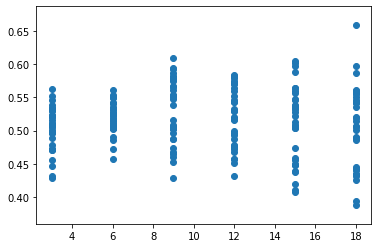

In [82]:
plt.scatter(tuneResults['Topics'],tuneResults['Coherence'])

In [75]:
tuneResults.columns

Index(['Validation_Set', 'Topics', 'Alpha', 'Beta', 'Coherence'], dtype='object')

In [76]:
tuneResults[tuneResults.Coherence==tuneResults.Coherence.values.ravel().max()]

,Validation_Set,Topics,Alpha,Beta,Coherence
91,75% Corpus,18,0.61,0.91,0.657931


In [77]:
tuneResults[tuneResults.Coherence > 0.58]

,Validation_Set,Topics,Alpha,Beta,Coherence
34,75% Corpus,9,0.01,0.61,0.593486
35,75% Corpus,9,0.01,0.91,0.593204
54,75% Corpus,12,0.31,0.61,0.582094
59,75% Corpus,12,0.61,0.91,0.583300
70,75% Corpus,15,0.31,0.61,0.601347
75,75% Corpus,15,0.61,0.91,0.587688
91,75% Corpus,18,0.61,0.91,0.657931
94,75% Corpus,18,0.91,0.61,0.587074
131,100% Corpus,9,0.01,0.91,0.609643
135,100% Corpus,9,0.31,0.91,0.586155


In [78]:
tuneResults[tuneResults.Coherence > 0.55].Coherence.sort_values(ascending=False)

91     0.657931
131    0.609643
171    0.603842
70     0.601347
166    0.596543
187    0.596315
34     0.593486
35     0.593204
75     0.587688
94     0.587074
135    0.586155
59     0.583300
138    0.582640
54     0.582094
39     0.579713
55     0.578456
42     0.576858
155    0.574834
38     0.574297
154    0.572072
63     0.571860
146    0.570031
130    0.567021
43     0.566107
161    0.564344
167    0.563668
151    0.563446
14     0.562894
46     0.561396
115    0.560768
86     0.560306
190    0.559469
66     0.559418
159    0.559292
182    0.557219
174    0.556499
191    0.554812
142    0.553672
134    0.553580
19     0.553357
50     0.552725
110    0.551438
Name: Coherence, dtype: float64

In [85]:
lda_model=gensim.models.LdaMulticore(corpus=bow_corpus,
                                        id2word=dictionary,
                                        num_topics=18,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        alpha=.61,
                                        eta=.91,
                                        per_word_topics=True)

In [98]:
coherence_model_lda=CoherenceModel(model=lda_model,texts=extracted_data,dictionary=dictionary)
coherence_lda=coherence_model_lda.get_coherence()
print("Coherence_Score : ",coherence_lda)

Coherence_Score :  0.6605331807651998


In [99]:
pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97716 sha256=2af42b192a5f19e60fdff7772394e1637ec918e322025a00a6a9ce7c3c4ad79a
  Stored in directory: c:\users\prasath\appdata\local\pip\cache\wheels\3b\fb\41\e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32045 sha256=d39d9654ddce09b9a02e8bd3f14afd609a98c8f1365c8931d3371a427e992f20
  Stored in directory: c:\users\prasath\appdata\local\pip\cache\wheels\3c\33\97\805b282e129f60bb4e87cea622338f30b65f21eaf65219971f
Successfully built pyLDAvis funcy
Note: you may need to restart the kernel to use updated packages.


In [100]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
pyLDAvis.enable_notebook()
LDAvis_prepared=pyLDAvis.gensim.prepare(lda_model,corpus_sets[0],dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.248629  0.146826       1        1  27.001623
16    -0.196675 -0.180065       2        1  21.224901
14     0.045089  0.008589       3        1   4.872246
17     0.036998  0.004213       4        1   4.146358
4      0.030813  0.002521       5        1   3.299637
7      0.035211  0.002311       6        1   3.208125
0      0.028296  0.001626       7        1   3.140481
6      0.025772  0.001463       8        1   3.066473
9      0.025701  0.001424       9        1   3.026400
12     0.025311  0.001366      10        1   3.015171
3      0.024524  0.001241      11        1   3.009662
8      0.024288  0.001229      12        1   3.008845
5      0.023883  0.001209      13        1   2.996707
13     0.023884  0.001209      14        1   2.996691
1      0.023884  0.001209      15        1   2.996691
10     0.023883  0.001209      16        1   2.996677
15     0.023883  0.001209      17        1   2.996668
11     0.023883  0.001209      18        1   2.996644, topic_info=          Term         Freq        Total Category  logprob  loglift
21       phone  2906.000000  2906.000000  Default  30.0000  30.0000
64      camera  1124.000000  1124.000000  Default  29.0000  29.0000
56     product   959.000000   959.000000  Default  28.0000  28.0000
111    quality   604.000000   604.000000  Default  27.0000  27.0000
8      battery   962.000000   962.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
353   Delivery     0.347888    14.717390  Topic18  -8.9971  -0.2372
2623      word     0.350983    19.591610  Topic18  -8.9882  -0.5144
376         ok     0.351643    25.865068  Topic18  -8.9863  -0.7904
2161   Speaker     0.344564    21.600821  Topic18  -9.0067  -0.6305
900     Device     0.338979    19.654150  Topic18  -9.0230  -0.5524

[1094 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1160      1  0.119905   AMAZON
1160      2  0.059952   AMAZON
1160      4  0.659476   AMAZON
1199      4  0.406623  AWESOME
1509      1  0.267642   Always
...     ...       ...      ...
4333      2  0.251905        📷
4333      6  0.125953        📷
7065      1  0.190719        😀
8444      1  0.152258        😎
8444      9  0.152258        😎

[683 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 17, 15, 18, 5, 8, 1, 7, 10, 13, 4, 9, 6, 14, 2, 11, 16, 12])

In [102]:
for idx,topic in lda_model.print_topics(-1):
    print("Topics : {} \n Words : {} ".format(idx,topic))
    print("\n")

Topics : 0 
 Words : 0.016*"Product" + 0.009*"Superb" + 0.003*"Price" + 0.000*"👍" + 0.000*"👌" + 0.000*"flashlight" + 0.000*"wire" + 0.000*"Simply" + 0.000*"Device" + 0.000*"phoneBut" 


Topics : 1 
 Words : 0.000*"fone" + 0.000*"Simply" + 0.000*"Need" + 0.000*"Awsm" + 0.000*"mobil" + 0.000*"Charge" + 0.000*"Handset" + 0.000*"features" + 0.000*"Cool" + 0.000*"Fine" 


Topics : 2 
 Words : 0.043*"phone" + 0.038*"product" + 0.027*"problem" + 0.026*"Lenovo" + 0.025*"issue" + 0.024*"mobile" + 0.018*"time" + 0.017*"day" + 0.015*"note" + 0.011*"Amazon" 


Topics : 3 
 Words : 0.004*"Ok" + 0.000*"Drain" + 0.000*"fone" + 0.000*"Simply" + 0.000*"Need" + 0.000*"Expectations" + 0.000*"Awsm" + 0.000*"mobil" + 0.000*"Charge" + 0.000*"Handset" 


Topics : 4 
 Words : 0.029*"Mobile" + 0.010*"Bad" + 0.003*"plz" + 0.001*"User" + 0.000*"dnt" + 0.000*"dis" + 0.000*"Friend" + 0.000*"Draining" + 0.000*"Bakwas" + 0.000*"china" 


Topics : 5 
 Words : 0.000*"fone" + 0.000*"Simply" + 0.000*"Need" + 0.000*"Awsm